 Computer vision is a multidisciplinary field that enables machines to interpret and
 understand visual data, such as images and videos. In this experiment, we explore
 different fields of computer vision, starting with basics of image manipulation, and
 going to more advanced problems such as object recognition and detection. We will
 mainly use OpenCV, Scikit-learn, and PyTorch Python packages for the procedure
 of this experiment. Parts of this experiment is based on PyTorch tutorials

 In the following sections, we will use the Birzeit University campus picture shown in Figure 1.1 as an example. To download the picture you can use the comman

In [1]:
!wget https://www.birzeit.edu/sites/default/files/buildings.jpg

--2024-11-27 17:41:54--  https://www.birzeit.edu/sites/default/files/buildings.jpg
Resolving www.birzeit.edu (www.birzeit.edu)... 172.67.38.181, 104.22.8.107, 104.22.9.107, ...
Connecting to www.birzeit.edu (www.birzeit.edu)|172.67.38.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258627 (253K) [image/jpeg]
Saving to: ‘buildings.jpg’

buildings.jpg       100%[===================>] 252.57K  --.-KB/s    in 0.02s   

2024-11-27 17:41:54 (10.2 MB/s) - ‘buildings.jpg’ saved [258627/258627]



Loading and displaying an image
 To load the image we downloaded to numpy array and display it, use the following
 code

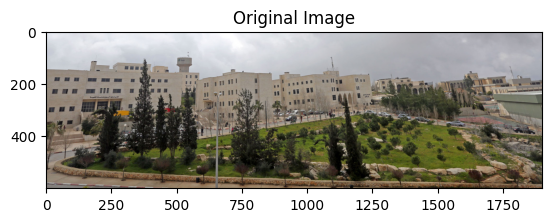

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
 # Load an image
image = cv.imread('buildings.jpg')
 # Display the image
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

 Task 1: What is the shape of the loaded image? What does each dimension represent?

In [11]:
image.shape

(600, 1900, 3)

600:height
1900:width
3:the color channels ( RGB)

Task 2: repeat the previous code but now pass the image directly to plt.imshow().
 I.e., without using cv.cvtColor(). Do you notice any difference? Why

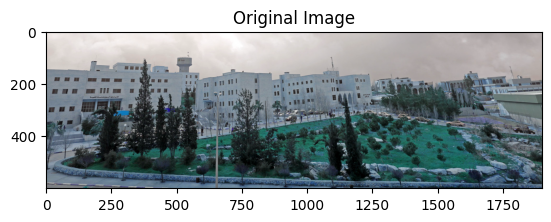

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt
 # Load an image
image = cv.imread('buildings.jpg')
 # Display the image
plt.imshow(image)
plt.title('Original Image')
plt.show()

The image did not appear in its true colors.

 Grayscale conversion
 To convert the image in the previous section into grayscale, use the code below

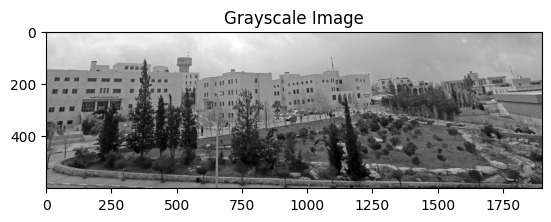

In [3]:
 # Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

 Task 3: What is the shape of the gray image? What does each dimension represent?

In [4]:
gray_image.shape

(600, 1900)

Height  and width

Image transformation
 Run the code below which applies some transformations on the image. Try to explain
 each of the applied transformations

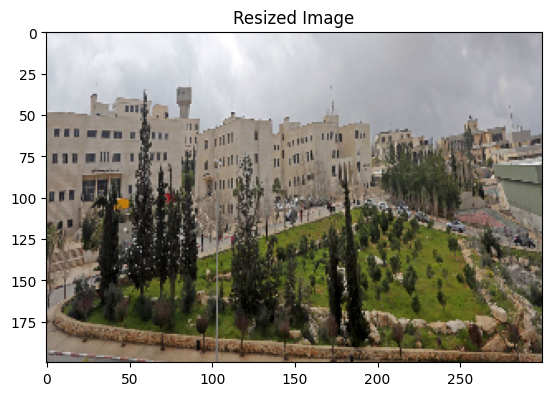

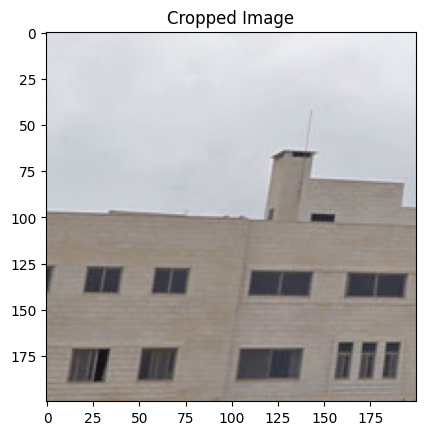

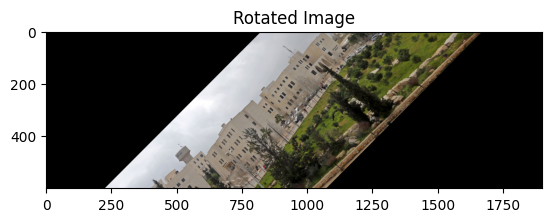

In [5]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
 # Resize and crop the image
resized_image = cv.resize(image, (300, 200))
cropped_image = image[50:250, 50:250]
 # Rotate the image
rows, cols = image.shape[:2]
M = cv.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))
 # Display the transformed images
plt.imshow(resized_image)
plt.title('Resized Image')
plt.show()
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

 Task 4: Rotate the original image by 10 degrees counter-clockwise around the upper
left corner of the image.

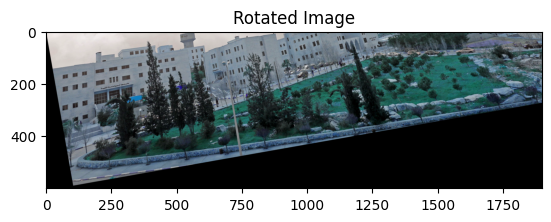

In [19]:
M = cv.getRotationMatrix2D((0, 0), 10, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

Gaussian blurring
 Gaussian blurring is used to reduce the noise in the image. However, it also affects the
 details of the input image. The basic idea is to convolve the image with a Gaussian
 kernel, which is a 2D bell-shaped function. The following code can be used to apply
 Gaussian blurring

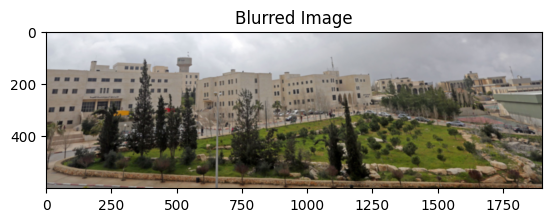

Text(0.5, 1.0, 'Original Image')

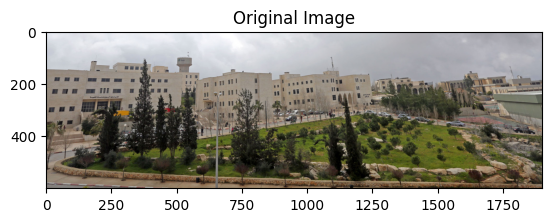

In [6]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (7, 7), 0)
 # Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()
plt.imshow(image)
plt.title('Original Image')

 Task 5: What does (7, 7) in the previous code represent? try to increase this value,
 what do you notice?

(7,7) represent the kernal size , here in this code we try (10,10)
the bluring in image  must increse with large kernal size

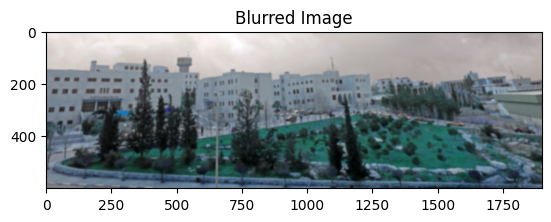

Text(0.5, 1.0, 'Original Image')

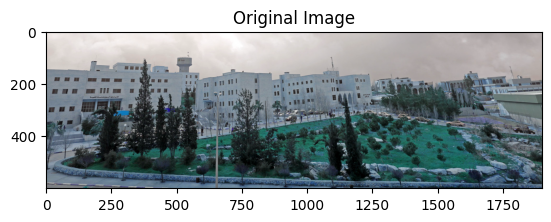

In [21]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (15, 15), 0)
 # Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()
plt.imshow(image)
plt.title('Original Image')

Edge detection
 To detect edges in the image, run the following code

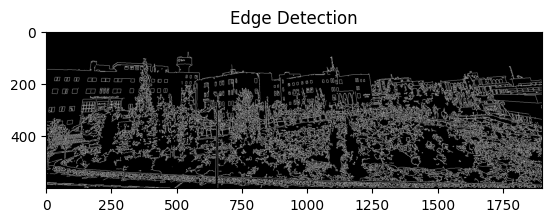

In [8]:
 # Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 150)
# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

 Task 6: Explain the parameters of cv.Canny(). How do they affect the results?

Canny is used to detect edges in an image. The first parameter is 50, threshold1, the lower threshold for edge detection. Values ​​less than this are not considered edges, and the second parameter is 150, the upper threshold for edge detection. Values ​​greater than this threshold are considered strong edges and values ​​between the two are considered weak edges.

 1.2 Image Classification / Object Recognition
 Image classification is a fundamental task in computer vision. The goal of image
 classification is to assign a single label for an input image. Typically, the image
 contains only one object, and the goal is to recognize which object is depicted in the
 image.
 For this lab, we will use the CIFAR10 dataset, which is a standard benchmark for im
age classification. The dataset consists of 10 classes: ‘airplane’, ‘automobile’, ‘bird’,
 ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. Each image in CIFAR10 are of size
 3 ×32×32, i.e. 3-channel color images of of size 32 × 32 pixels.
 1.2.1 Image classification with MLP
 In this section, we will train an MLP classifier on CIFAR10 dataset. Let’s start by
 loading the dataset. Luckiley, PyTorch has a package called torchvision, that has
 data loaders for common datasets including CIFAR10, and data transformers for im
ages torchvision.datasets and torch.utils.data.DataLoader.
 Loading images
 The first step is to load and normalize the CIFAR10 training and test images using
 torchvision

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 16
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:03<00:00, 48.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 The output of torchvision datasets are PILImage images of range [0, 1]. We transform
 them to Tensors of normalized range [-1, 1]. The following code shows some of the
 training images.

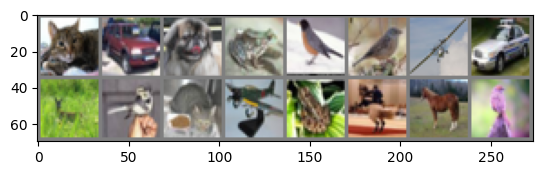

cat   car   dog   frog  bird  bird  plane car   deer  bird  cat   plane frog  horse horse bird 


In [14]:
import matplotlib.pyplot as plt
import numpy as np
 # functions to show an image
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()
 # get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
 # show images
imshow(torchvision.utils.make_grid(images))
 # print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [15]:
images.shape

torch.Size([16, 3, 32, 32])

In [16]:
npimg=torchvision.utils.make_grid(images)

In [17]:
np.transpose(npimg, (1, 2, 0)).shape

torch.Size([70, 274, 3])

 Task 7: Explain the effect of the following transforms transforms.ToTensor(), and
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).

transforms.ToTensor converts the image to a Tensor object so that it can be processed by PyTorch. It also prepares the image to be used as input for the neural network.

transforms.Normalize The first value is the average for each channel (R, G, B), and the second value is the standard deviation for each channel, which makes the pixel values ​​in the range [-1, 1]

Task 8: What is the purpose of the following line: np.transpose(npimg, (1, 2, 0))?

Change the image dimension order from (Channels, Height, Width) to (Height, Width, Channels) to display correctly using plt.imshow().

 Defining the network
 Let’s define a simple MLP. This network is the same as the MLP from experiment 7,
 except for the input layer, which has more inputs

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
 def __init__(self):
  super(Net, self).__init__()
  self.fc1 = nn.Linear(3072, 64)
  self.fc2 = nn.Linear(64, 64)
  self.fc3 = nn.Linear(64, 10)
 def forward(self, x):
 # apply the first layer with relu activation
  x = F.relu(self.fc1(x))
  x = F.relu(self.fc2(x))
  x = self.fc3(x)
  return x
net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
 # Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net.to(device)

cpu


Net(
  (fc1): Linear(in_features=3072, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
32*32*3

 Define a Loss function and optimizer
 Let’s use a Classification Cross-Entropy loss and SGD with momentum

In [23]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

 Train the network

In [24]:
net.train()
for epoch in range(2): # loop over the dataset multiple times
 running_loss = 0.0
 for i, data in enumerate(trainloader, 0):
 # get the inputs; data is a list of [inputs, labels]
  inputs, labels = data
  inputs = inputs.to(device)
  labels = labels.to(device)
  optimizer.zero_grad()
 # forward + backward + optimize
  outputs = net(torch.flatten(inputs,1))
  loss = criterion(outputs, labels)
  loss.backward()
  optimizer.step()
 # print statistics
  running_loss += loss.item()
  if i % 500 ==499: # print every 2000 mini-batches
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
    running_loss = 0.0
print('Finished Training')

[1,   500] loss: 0.538
[1,  1000] loss: 0.476
[1,  1500] loss: 0.447
[1,  2000] loss: 0.433
[1,  2500] loss: 0.424
[1,  3000] loss: 0.417
[2,   500] loss: 0.399
[2,  1000] loss: 0.399
[2,  1500] loss: 0.395
[2,  2000] loss: 0.391
[2,  2500] loss: 0.385
[2,  3000] loss: 0.384
Finished Training


 Test the network on the test data
 We have trained the network for 2 passes over the training dataset. But we need to
 check if the network has learnt anything at all.
 We will check this by predicting the class label that the neural network outputs, and
 checking it against the ground-truth. If the prediction is correct, we add the sample
 to the list of correct predictions.

In [25]:
correct = 0
total = 0

# Since we're not training, we don't need to calculate the gradients for our outputs
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Calculate outputs by running images through the network
        outputs = net(torch.flatten(images, 1))

        # The class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print accuracy of the network
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 46 %


 Task 9: For the first layer in the MLP (self.fc1 = nn.Linear(3072, 64) ), what does
 the number 3072 represent?

It is the number of inputs in the first layer and represents the number of pixels in a 32 x 32 pixel color image.

1.2.2 Image classification with CNNs
 In the previous section, we used a MLP to classifiy images. However, for this type
 of data, convolutional neural networks (CNNs) are a better choice. Convolutional
 Neural Networks (CNNs) are a class of deep learning models designed specifically for
 processing structured grid data, such as images. The key innovation of CNNs lies
 in their ability to automatically and adaptively learn hierarchical representations of
 input data. The fundamental building blocks of CNNs are convolutional layers, which
 apply convolution operations to the input data. Convolution involves sliding a small
 f
 ilter (also called a kernel) across the input, performing element-wise multiplications,
 and aggregating the results to create a feature map.
 CNNs excel at capturing spatial hierarchies and local patterns within the input
 data. Convolutional layers are typically followed by activation functions (e.g., ReLU)
 to introduce non-linearity and pooling layers to downsample the spatial dimensions,
 reducing the computational load and preserving important features. The final layers
 of a CNN typically include fully connected layers to make predictions based on the
 learned hierarchical representations. CNNs have proven highly effective in various
 computer vision tasks, such as image classification, object detection, and image seg
mentation, due to their ability to automatically learn relevant features from raw pixel
 data. Figure 1.2 shows the general architecture of CNNs

As shown in the figure, CNNs usually contains three types of layes:
 • Convolutional Layer: The convolutional layer is the core building block of a
 CNN. It applies convolution operations to the input data using filters or kernels.
 These filters slide over the input, performing element-wise multiplications and
 aggregating the results to create feature maps. This process allows the network
 to automatically learn spatial hierarchies and local patterns, capturing relevant
 features in the input data. Figure 1.3 shows a convolutional layer with 2 filters.
 • Pooling Layer: Pooling layers are used to downsample the spatial dimensions
 of the feature maps generated by the convolutional layers. Max pooling and

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class NetCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Define the forward pass
        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer + pooling
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer + pooling
        x = torch.flatten(x, 1)  # Flatten all dimensions except batch
        x = F.relu(self.fc1(x))  # First fully connected layer
        x = F.relu(self.fc2(x))  # Second fully connected layer
        x = self.fc3(x)  # Output layer
        return x

# Initialize the network
net = NetCNN()

# Move the network to the desired device (e.g., CUDA or CPU)
net = net.to(device)


 Task 10: Study the CNN code and answer the following questions:- How many layers does the network have?- What does the parameters of nn.Conv2d represent?- What does the parameters of nn.MaxPool2d represent?- In the first linear layer, what does the number 16 * 5 * 5 represent? How to obtain
 this number

1-7 basic layers


2- What does the parameters of nn.Conv2d represent?

3:Number of channels

6:Number of  features generated.

5:kernal size


What does the parameters of nn.MaxPool2d represent?

2:kernal size

2:The step between each assembly process

In the first linear layer, what does the number 16 * 5 * 5 represent? How to obtain this number

- number of input

The original image dimensions 32×32 are gradually reduced to
5
×
5

There are 16 channels after the second layer Conv2d.
So, the total size is
16
×
5
×
5
=
400
16×5×5=400.



 1.2.3 Transfer Learning
 In previous sections, we worked with simple networks, but in practical applications,
 more extensive networks with millions of parameters are often employed. Training

such complex models from scratch on small datasets tends to lead to overfitting. To
 avoid this problem, transfer learning can be used. In the transfer learning paradigm,
 a model pre-trained on a task is utilized to improve performance on a different yet
 related task. The approach involves training the model on a task where a large
 dataset is available and subsequently applying this acquired knowledge to a new,
 often smaller, dataset. There are two main approaches for transfer learning:
 • Finetuning: Instead of random initialization, we initialize the network with a
 pretrained network. Rest of the training looks as usual.
 • ConvNet as fixed feature extractor: Here, we freeze the weights for all of the
 network except that of the final fully connected layer. This last fully connected
 layer is replaced with a new one with random weights and only this layer is
 trained.
 Finetuning the ConvNet
 In this section, we will finetune AlexNet, which is a commonly used network for
 image related tasks. To this end, repeat the training and testing procedure from the
 previous section to train AlexNet model pre-trained on the imagenet dataset. To
 define the network, you can use the following code. Make sure to use GPU for this
 part, otherwise, training would take very long time.

In [28]:
from torchvision import datasets, models
net = models.alexnet(weights='IMAGENET1K_V1')
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 83.2MB/s]


In [29]:
transform = transforms.Compose(
 [transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

 Finetuning vs Learning from scratch
 Repeat the previous part but now without using the pretrained weights. What
 do you notice?
 To use AlexNet with random initialization you can use the following code to define
 the model

In [30]:
from torchvision import datasets, models
net = models.alexnet()
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)